In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math
import scipy.stats
from scipy.stats import beta

The data average is:  14.768
The data variance is:  2.230787999999999
The 95% central interval is:  [14.108628074542155, 15.427371925457846]
We can see that the mean falls in the range of 95% interval


********************************************************************************


The posterior variance is:  1.5841832280389785
The 95% central interval for the windshield is:  [11.022001920935251, 18.51399807906475]


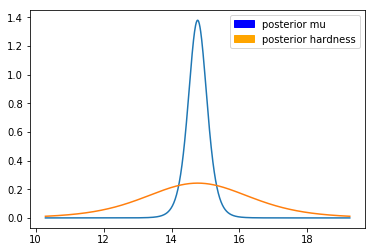

In [6]:
# 1.

y = pd.read_csv('windshieldy1.txt', sep='\n')
y = np.array(y)

n = len(y)
mean_y = np.mean(y)
variance_y = scipy.stats.tvar(y)
std_y = np.std(y, ddof=1)

# a)
x = np.arange(mean_y - 3 * math.sqrt(variance_y), mean_y + 3 * math.sqrt(variance_y), 0.01)
posterior_mu = scipy.stats.t.pdf(x, n-1, mean_y, variance_y/n)
per_25 = scipy.stats.t.ppf(0.025, n-1, mean_y, variance_y/n)
per_975 = scipy.stats.t.ppf(0.975, n-1, mean_y, variance_y/n)

percentile_interval_y = [per_25, per_975]
print('The data average is: ', mean_y)
print('The data variance is: ', variance_y)
print('The 95% central interval is: ', percentile_interval_y)
plt.plot(x, posterior_mu)
print('We can see that the mean falls in the range of 95% interval')

print('\n')
print('*' * 80)
print('\n')

# b)
scale = math.sqrt(1 + 1/n) * std_y
posterior_hardness = scipy.stats.t.pdf(x, n-1, mean_y, scale)
print('The posterior variance is: ', scale)
per_25_hardness = scipy.stats.t.ppf(0.025, n-1, mean_y, scale)
per_975_hardness = scipy.stats.t.ppf(0.975, n-1, mean_y, scale)
percentile_interval_hardness = [per_25_hardness, per_975_hardness]
print('The 95% central interval for the windshield is: ', percentile_interval_hardness)

plt.plot(x, posterior_hardness)
# The values should fall into that interval with 95% confidence

blue_patch = mpatches.Patch(color='blue', label='posterior mu')
orange_patch = mpatches.Patch(color='orange', label='posterior hardness')
plt.legend(handles=[blue_patch, orange_patch])
plt.show()

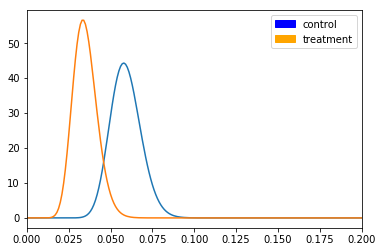

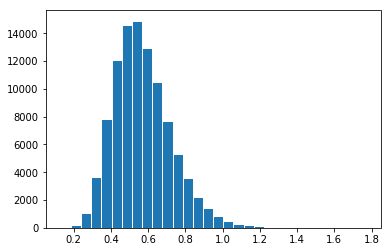

The control mean is:  0.05925925925925926
The 95% confidence interval for control is:  [0.04265327118087194, 0.07810567000294681]
The treatment mean is:  0.033773861967694566
The 95% confidence interval for treatment is:  [0.021541665612894275, 0.048538936879460065]


In [156]:
# 2.
# a)

control_number = 674
control_alpha = 39
control_beta = 635


treatment_number = 680
treatment_alpha = 22
treatment_beta = 658

alpha_prior = 1
beta_prior = 1
control_posterior = (control_alpha+1) / (control_number+1)
treatment_posterior = (treatment_alpha+1) / (treatment_number+1)

alpha_post_1 = alpha_prior + control_alpha
beta_post_1 = beta_prior + control_beta

alpha_post_2 = alpha_prior + treatment_alpha
beta_post_2 = beta_prior + treatment_beta

x = np.arange(0, 1, 0.001)

density_control = beta.pdf(x, alpha_post_1, beta_post_1)
density_treatment = beta.pdf(x, alpha_post_2, beta_post_1)

plt.plot(x, density_control)
plt.plot(x, density_treatment)

blue_patch = mpatches.Patch(color='blue', label='control')
orange_patch = mpatches.Patch(color='orange', label='treatment')
plt.legend(handles=[blue_patch, orange_patch])
plt.axis([0, 0.2, None, None])
plt.show()

p0_random = beta.rvs(alpha_post_1, beta_post_1, size = 100000)
p1_random = beta.rvs(alpha_post_2, beta_post_2, size = 100000)

odds_ratio = (p1_random / (1 - p1_random)) / (p0_random / (1 - p0_random))
plt.hist(odds_ratio, bins = 30, ec='white')
plt.show()

control_mean = np.mean(control_number)
control_variance = np.var(control_number)

treatment_mean = np.mean(treatment_number)
treatment_variance = np.var(treatment_number)

control_mean = np.mean(control_posterior)
print('The control mean is: ', control_mean)

per_25_control = np.percentile(p0_random, 2.5)
per_975_control = np.percentile(p0_random, 97.5)
percentile_interval_control = [per_25_control, per_975_control]
print('The 95% confidence interval for control is: ', percentile_interval_control)


treatment_mean = np.mean(treatment_posterior)
print('The treatment mean is: ', treatment_mean)

per_25_treatment = np.percentile(p1_random, 2.5)
per_975_treatment = np.percentile(p1_random, 97.5)
percentile_interval_treatment = [per_25_treatment, per_975_treatment]
print('The 95% confidence interval for treatment is: ', percentile_interval_treatment)

# b)


The mean of mu difference is:  -1.0391296511664119
The 95% confidence interval for mu difference is:  [-1.7094702546954312, -0.3657592761710043]
There is a 95% confidence that the values will be in range:  [-1.7094702546954312, -0.3657592761710043]
There is : 99.608 % chance that the numbers are below 0 which means that its highly unlikely that the means are the same


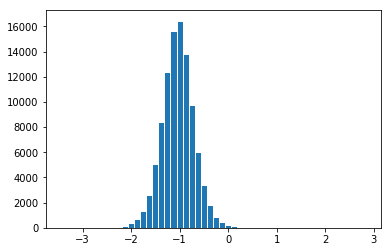

In [152]:
# 3.
# a)

y_2 = pd.read_csv('windshieldy2.txt', sep='\n')
y_2 = np.array(y_2)

n_2 = len(y_2)
mean_y_2 = np.mean(y_2)
variance_y_2 = scipy.stats.tvar(y_2)
std_y_2 = np.std(y_2, ddof=1)

x_2 = np.arange(mean_y_2 - 3 * math.sqrt(variance_y_2), mean_y_2 + 3 * math.sqrt(variance_y_2), 0.01)
posterior_mu_2 = scipy.stats.t.pdf(x_2, n-1, mean_y_2, variance_y_2/n_2)

mu_random = scipy.stats.t.rvs(n-1, mean_y, variance_y/n, 100000)
mu_2_random = scipy.stats.t.rvs(n_2-1, mean_y_2, variance_y_2/n_2, 100000)

mu_dif = mu_random - mu_2_random
plt.hist(mu_dif, bins = 50, ec='white')

mean_mu_dif = np.mean(mu_dif)
print('The mean of mu difference is: ', mean_mu_dif)

per_25_mu_dif = np.percentile(mu_dif, 2.5)
per_975_mu_dif = np.percentile(mu_dif, 97.5)
percentile_interval_mu_dif = [per_25_mu_dif, per_975_mu_dif]
print('The 95% confidence interval for mu difference is: ', percentile_interval_mu_dif)
print('There is a 95% confidence that the values will be in range: ', percentile_interval_mu_dif)

# b)
below_0 = scipy.stats.percentileofscore(mu_dif, 0)
print('There is : {0}'.format(below_0) + ' % chance that the numbers are below 0 which means that its highly unlikely that the means are the same')